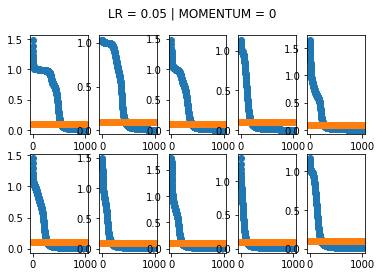

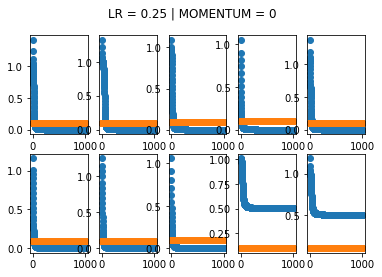

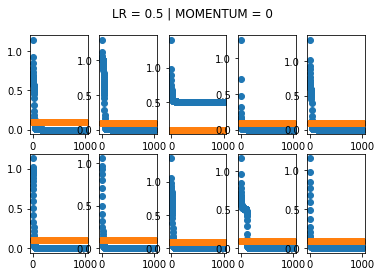

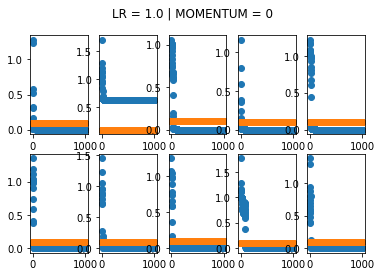

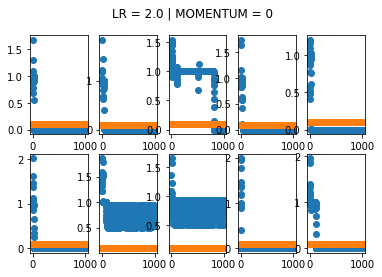

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras import activations
from keras import optimizers

EPOCHS = 1000

HL_NEURONS = 2
LR = np.array([0.05, 0.25, 0.5, 1, 2])

ACTIVATION = activations.tanh
MOMENTUM = 0
SHUFFLE = False

LOSS_TARGET = 0.1

# the four different states of the XOR gate
training_data = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])

# the four expected results in the same order
target_data = np.array([[-1], [1], [1], [-1]])

loss_target = np.array([LOSS_TARGET for i in range(EPOCHS)])

for k in range(len(LR)):
    fig, plots = plt.subplots(2, 5)
    fig.suptitle(f'LR = {LR[k]} | MOMENTUM = {MOMENTUM}')
    for i in range(2):
        for j in range(5):
            model = Sequential()
            model.add(Dense(HL_NEURONS, input_dim=2, activation=ACTIVATION))
            model.add(Dense(1, activation=ACTIVATION))

            model.compile(loss='mean_squared_error',
                          optimizer=optimizers.gradient_descent_v2.SGD(
                              learning_rate=LR[k],
                              momentum=MOMENTUM),
                          metrics=None)

            history = model.fit(training_data,
                                target_data,
                                shuffle=SHUFFLE,
                                epochs=EPOCHS,
                                verbose=None,
                                use_multiprocessing=True)

            plots[i, j].plot(np.array(history.history['loss']), 'o')
            plots[i, j].plot(loss_target, 'o')

plt.show()
